In [13]:
import pandas as pd
import numpy as np
import csv
from scipy import stats

In [14]:
path= r"C:\Users\Jacob\Desktop\Risk Models\risk.xlsx"
df = pd.read_excel(path)
df.head()

,id,Name,Gender,Age,Credit Enquiry,Credit Usage Rate,Score
0,111.0,JACOB,M,48,25,71,0
1,112.0,STEFFANO,M,33,22,70,0
2,113.0,MADHAV,M,25,28,32,0
3,114.0,VAIBHAV,M,35,12,68,0
4,115.0,RIJO,M,32,17,80,0


In [15]:
df

,id,Name,Gender,Age,Credit Enquiry,Credit Usage Rate,Score
0,111.0,JACOB,M,48,25,71,0
1,112.0,STEFFANO,M,33,22,70,0
2,113.0,MADHAV,M,25,28,32,0
3,114.0,VAIBHAV,M,35,12,68,0
4,115.0,RIJO,M,32,17,80,0
...,...,...,...,...,...,...,...
625,NaN,NaN,NaN,47,12,23,1
626,NaN,NaN,NaN,49,15,56,0
627,NaN,NaN,NaN,41,28,58,0
628,NaN,NaN,NaN,33,20,21,1


In [9]:
print(df.dtypes)

id                   float64
Name                  object
Gender                object
Age                    int64
Credit Enquiry         int64
Credit Usage Rate      int64
Score                  int64
dtype: object


In [16]:
df.corr()

,id,Age,Credit Enquiry,Credit Usage Rate,Score
id,1.000000,-0.006775,-0.109258,-0.291502,0.156893
Age,-0.006775,1.000000,-0.027121,-0.014325,0.215047
Credit Enquiry,-0.109258,-0.027121,1.000000,0.050447,-0.095317
Credit Usage Rate,-0.291502,-0.014325,0.050447,1.000000,-0.652642
Score,0.156893,0.215047,-0.095317,-0.652642,1.000000


In [17]:
%%capture
! pip install seaborn

In [18]:
import matplotlib.pyplot as plt
import  seaborn as sns#
%matplotlib inline

(0, 1.0504372306317669)

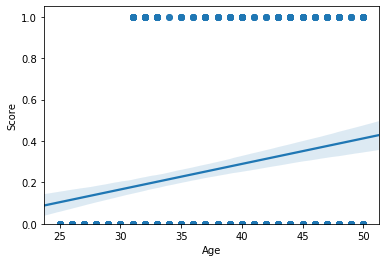

In [19]:
sns.regplot(x="Age",y="Score",data=df)
plt.ylim(0,)

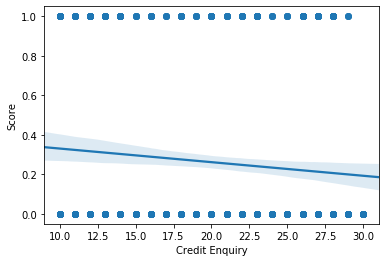

In [20]:
sns.regplot(x="Credit Enquiry",y = "Score",data=df)

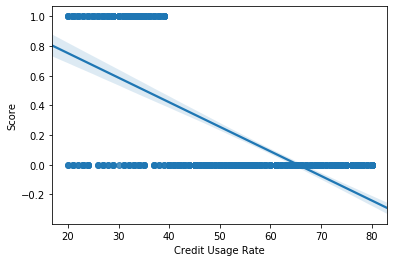

In [21]:
sns.regplot(x= "Credit Usage Rate",y = "Score",data=df)

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#trying to train and fit the model

In [28]:
x = df[["Age","Credit Enquiry","Credit Usage Rate"]]
y = df[["Score"]]

In [29]:
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)#20 TO BE TESTED AND 80 TO BE TRAINED

In [30]:
model = LogisticRegression(solver = "liblinear",random_state=0)

In [31]:
model.fit(X_train,y_train)

C:\Users\Jacob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
print("Training Accuracy of LogisticRegression: ",model.score(X_train,y_train))

Training Accuracy of LogisticRegression:  0.9087301587301587


In [33]:
model.classes_#y values 0 & 1

array([0, 1], dtype=int64)

In [48]:
model.predict_proba(x)#1 column probability of bieng 0 then 1

SyntaxError: invalid syntax (<ipython-input-48-8264eeab0ccf>, line 1)

In [35]:
y_lr = model.predict(X_test)

In [36]:
print("Testing Accuracy LogisticRegression: ",accuracy_score(y_lr,y_test))

Testing Accuracy LogisticRegression:  0.9206349206349206


In [37]:
y_lr

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [41]:
y_test

,Score
497,0
244,0
552,0
213,0
549,1
...,...
388,0
322,1
218,0
462,1


In [40]:
confusion_matrix(y,model.predict(x))

array([[436,  29],
       [ 27, 138]], dtype=int64)

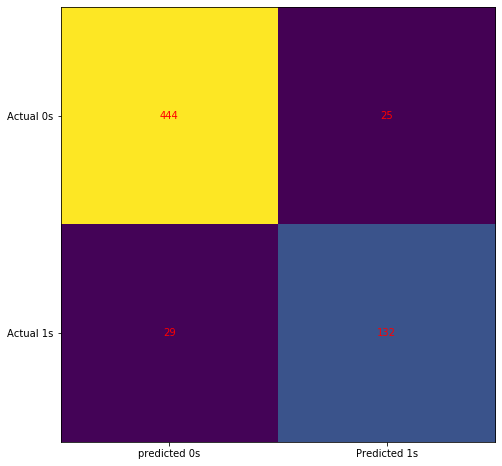

In [27]:
cm = confusion_matrix(y,model.predict(x))


fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=("predicted 0s","Predicted 1s"))
ax.yaxis.set(ticks=(0,1),ticklabels=("Actual 0s","Actual 1s"))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha = "center",va ="center" ,color="red")
plt.show()        

In [42]:
df1 = pd.DataFrame({"Name":["nairobi","Berlin","Denver","tokyo"],"Gender":["M","M","F","M"],"Age":[42,45,46,47],"Credit EnquirieMONTHLY":[25,23,22,21],"Credit Usage rateMONTHLY":[30,31,32,38]},index=[0,1,2,3])
df2 = pd.DataFrame({"Name":"tokyo","Gender":"M","Age":25,"Credit EnquirieMONTHLY":44,"Credit Usage rateMONTHLY":38},index=[0])
df3 = pd.DataFrame({"Name":"tokyo","Gender":"M","Age":20,"Credit EnquirieMONTHLY":50,"Credit Usage rateMONTHLY":60},index=[0])

In [43]:
df1

,Name,Gender,Age,Credit EnquirieMONTHLY,Credit Usage rateMONTHLY
0,nairobi,M,42,25,30
1,Berlin,M,45,23,31
2,Denver,F,46,22,32
3,tokyo,M,47,21,38


In [44]:
x = df1[["Age","Credit EnquirieMONTHLY","Credit Usage rateMONTHLY"]]

In [45]:
model.predict(x)

array([1, 1, 1, 1], dtype=int64)